### Mouse Study Data Analyis

1) Capomulin and Ramicane showed overall lowest tumor volume of all drug regimen's during the 45 day treatement trial. 
2) The potential outliners for Capomulin and Ramicane were significantly lower than the other drug regimen. This tells us that Capomulin and Ramicane were more likely to reduce the Tumor volume than other drug regimen. 
3) While Capomulin and Ramicane were mostly likely to reduce the tumor volume Capomulin and Ramicane had higher Metastatic Site for a total of 230. While Infubinol and Ceftamin only had a total of 178.

In [71]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merged_data = pd.merge(mouse_metadata, study_results, on='Mouse ID', how='outer')
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [72]:
# Checking the number of mice.
len(merged_data['Mouse ID'])
merged_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [73]:
# Generate a summary statistics table consisting of the mean, median, variance, standard deviation, and SEM of the tumor volume for each drug regimen.
dr_groupby = merged_data.groupby('Drug Regimen')
summary_table = dr_groupby.agg(['mean', 'median', 'var', 'std', 'sem'])['Tumor Volume (mm3)']
summary_table

,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0.5, 1.0, 'Timepoints per Drug Regimen')

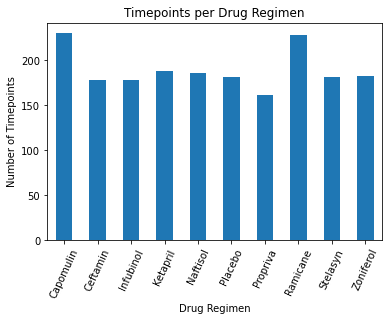

In [74]:
## pandas's 'DataFrame.plot()
timepoints_data = merged_data.groupby('Drug Regimen').count()['Timepoint']
timepoints_df = pd.DataFrame(timepoints_data)

bar_plot = timepoints_df.plot.bar(legend=False, rot=65)
bar_plot
plt.ylabel('Number of Timepoints')
plt.xlabel('Drug Regimen')
plt.title('Timepoints per Drug Regimen')



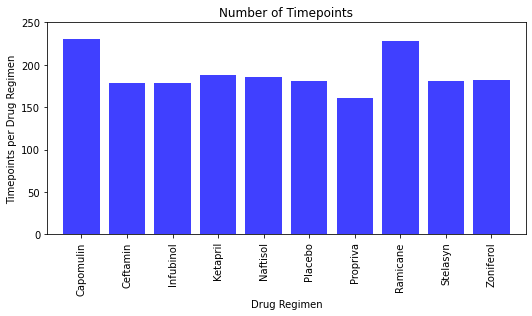

In [75]:
## Matplotlib's `pyplot
# Set x axis and tick locations
x_axis = np.arange(len(timepoints_df))
tick_locations = [x for x in x_axis]
reset_timepoint_df = timepoints_df.reset_index()
# Create a list indicating where to write x labels and set figure size to adjust for space
plt.figure(figsize=(7.5,4.5))
plt.bar(x_axis, reset_timepoint_df['Timepoint'], color='blue', alpha=.75, align='center')
plt.xticks(tick_locations, reset_timepoint_df['Drug Regimen'], rotation='vertical')
# Set x and y limits
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0,250)

# Set a Title and labels
plt.title("Number of Timepoints")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoints per Drug Regimen")

# Save our graph and show the grap
plt.tight_layout()
plt.savefig("bar_table.png")
plt.show()

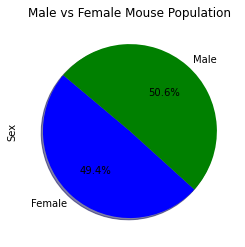

In [76]:
## Matplotlib's `pyplot
gender_groupby = merged_data.groupby('Sex').count()['Mouse ID']

# gender_label = [merged_data['Sex'].unique()] 
# gender_list = list(gender_groupby.index)

colors = ['blue','green']
# Tell matplotlib to create a pie chart based upon the above data
plt.pie(gender_groupby, labels=gender_groupby.index, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')
# Save an image of our chart and print the final product to the screen
plt.savefig("Pie_plot1.png")
plt.show()




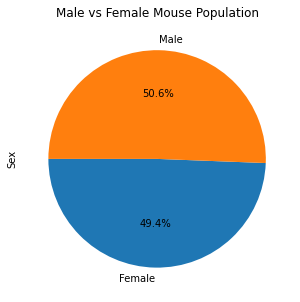

In [77]:
## pandas's plot()
piechart2 = gender_groupby.plot.pie(y='gender_groupby', figsize=(5, 5), autopct="%1.1f%%",startangle=180)
plt.title('Male vs Female Mouse Population')
plt.ylabel('Sex')

plt.savefig("Pie_plot2.png")
plt.show()

In [78]:
# loc each treatment regimen
capo_loc = merged_data.loc[merged_data['Drug Regimen'] == 'Capomulin']
ram_loc = merged_data.loc[merged_data['Drug Regimen'] == 'Ramicane']
inf_loc = merged_data.loc[merged_data['Drug Regimen'] == 'Infubinol']
ceft_loc = merged_data.loc[merged_data['Drug Regimen'] == 'Ceftamin']
print(capo_loc)

     Mouse ID Drug Regimen     Sex  Age_months  Weight (g)  Timepoint  \
10       s185    Capomulin  Female           3          17          0   
11       s185    Capomulin  Female           3          17          5   
12       s185    Capomulin  Female           3          17         10   
13       s185    Capomulin  Female           3          17         15   
14       s185    Capomulin  Female           3          17         20   
...       ...          ...     ...         ...         ...        ...   
440      i557    Capomulin  Female           1          24         45   
1452     r157    Capomulin    Male          22          25          0   
1453     r157    Capomulin    Male          22          25          5   
1454     r157    Capomulin    Male          22          25         10   
1455     r157    Capomulin    Male          22          25         15   

      Tumor Volume (mm3)  Metastatic Sites  
10             45.000000                 0  
11             43.878496         

In [79]:
#determining the total number of Metastatic sites for each drug regimen
capo_ms = capo_loc['Metastatic Sites'].count()
ram_ms = ram_loc['Metastatic Sites'].count()
inf_ms = inf_loc['Metastatic Sites'].count()
ceft_ms = ceft_loc['Metastatic Sites'].count()
print(capo_ms)
print(ram_ms)
print(inf_ms)
print(ceft_ms)

230
228
178
178


In [80]:
#group, create a dataframe, then merge that data on mouse id and timepoint
cap_grouped = capo_loc.groupby('Mouse ID').max()['Timepoint']
cap_df = pd.DataFrame(cap_grouped)
capo_merged = pd.merge(cap_df, merged_data, on=('Mouse ID','Timepoint'), how='left')
capo_merged.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,b128,45,Capomulin,Female,9,22,38.982878,2
1,b742,45,Capomulin,Male,7,21,38.939633,0
2,f966,20,Capomulin,Male,16,17,30.485985,0
3,g288,45,Capomulin,Male,3,19,37.074024,1
4,g316,45,Capomulin,Female,22,22,40.159220,2


In [81]:
#Calculate the quartiles and IQR and quantitatively
capo_tumor = capo_merged['Tumor Volume (mm3)']

quartiles = capo_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print out the potential outliers.
print(f" Capomulin potential outliner values could be below {lower_bound} and {upper_bound}.")

 Capomulin potential outliner values could be below 20.70456164999999 and 51.83201549.


In [82]:
#group, create a dataframe, then merge that data on mouse id and timepoint
ram_grouped = ram_loc.groupby('Mouse ID').max()['Timepoint']
ram_df = pd.DataFrame(ram_grouped)
ram_merged = pd.merge(ram_df, merged_data, on=('Mouse ID','Timepoint'), how='left')
ram_merged.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a411,45,Ramicane,Male,3,22,38.407618,1
1,a444,45,Ramicane,Female,10,25,43.047543,0
2,a520,45,Ramicane,Male,13,21,38.810366,1
3,a644,45,Ramicane,Female,7,17,32.978522,1
4,c458,30,Ramicane,Female,23,20,38.342008,2


In [83]:
#Calculate the quartiles and IQR and quantitatively
ram_tumor = ram_merged['Tumor Volume (mm3)']

quartiles = ram_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

#print out the potential outliers.
print(f"Ramicane potential outliner values could be below {lower_bound} and {upper_bound}.")

Ramicane potential outliner values could be below 17.912664470000003 and 54.30681135.


In [84]:
#group, create a dataframe, then merge that data on mouse id and timepoint
inf_grouped = inf_loc.groupby('Mouse ID').max()['Timepoint']
inf_df = pd.DataFrame(inf_grouped)
inf_merged = pd.merge(inf_df, merged_data, on=('Mouse ID','Timepoint'), how='left')
inf_merged.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a577,30,Infubinol,Female,6,25,57.031862,2
3,a685,45,Infubinol,Male,8,30,66.083066,3
4,c139,45,Infubinol,Male,11,28,72.226731,2


In [85]:
#Calculate the quartiles and IQR and quantitatively
inf_tumor = inf_merged['Tumor Volume (mm3)']

quartiles = inf_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol potential outliner values could be below {lower_bound} and {upper_bound}.")

Infubinol potential outliner values could be below 36.83290494999999 and 82.74144559000001.


In [86]:
#group, create a dataframe, then merge that data on mouse id and timepoint
ceft_grouped = ceft_loc.groupby('Mouse ID').max()['Timepoint']
ceft_df = pd.DataFrame(ceft_grouped)
ceft_merged = pd.merge(ceft_df, merged_data, on=('Mouse ID','Timepoint'), how='left')
ceft_merged.head(5)

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a275,45,Ceftamin,Female,20,28,62.999356,3
1,b447,0,Ceftamin,Male,2,30,45.000000,0
2,b487,25,Ceftamin,Female,6,28,56.057749,1
3,b759,30,Ceftamin,Female,12,25,55.742829,1
4,f436,15,Ceftamin,Female,3,25,48.722078,2


In [87]:
#Calculate the quartiles and IQR and quantitatively
ceft_tumor = ceft_merged['Tumor Volume (mm3)']

quartiles = ceft_tumor.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin potential outliner values could be below {lower_bound} and {upper_bound}.")

Ceftamin potential outliner values could be below 25.355449580000002 and 87.66645829999999.


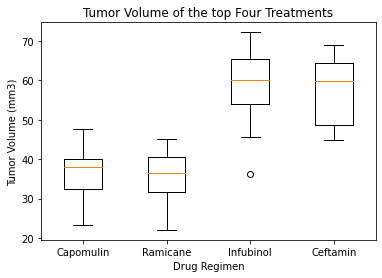

In [88]:
# * Using Matplotlib, generate a box and whisker plot of the final tumor volume for all four treatment regimens 
# and highlight any potential outliers in the plot by changing their color and style.
tumor_data = [capo_tumor,ram_tumor,inf_tumor,ceft_tumor]
fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume of the top Four Treatments')
ax1.set_xlabel('Drug Regimen')
ax1.set_ylabel('Tumor Volume (mm3)')
ax1.boxplot(tumor_data, labels=['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])
plt.show()

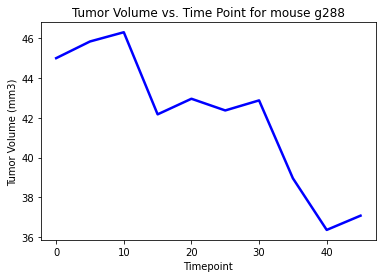

In [89]:
# * Select a mouse that was treated with Capomulin and generate a line plot of tumor volume vs. time point for that mouse.
capo_mouse = capo_loc[capo_loc['Mouse ID'] == 'g288']

linex_axis = capo_mouse['Timepoint']
liney_axis = capo_mouse['Tumor Volume (mm3)']

plt.plot(linex_axis, liney_axis, linewidth=2.5, color="blue")
plt.title("Tumor Volume vs. Time Point for mouse g288")
plt.xlabel("Timepoint")
plt.ylabel('Tumor Volume (mm3)')

#save the graph
plt.savefig("Capomulin_lineplot.png")
plt.show()

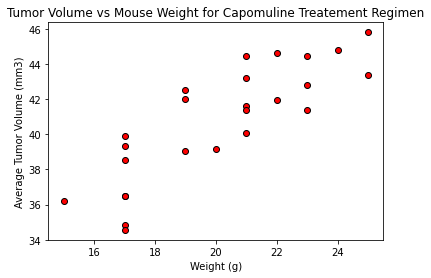

In [90]:
# * Generate a scatter plot of tumor volume versus mouse weight for the Capomulin treatment regimen.
capo_average =  capo_loc.groupby(['Mouse ID']).mean()

plt.scatter(capo_average['Weight (g)'], capo_average['Tumor Volume (mm3)'], marker="o", facecolors="red", edgecolors="black")
plt.title("Tumor Volume vs Mouse Weight for Capomuline Treatement Regimen")
plt.xlabel("Weight (g)")
plt.ylabel('Average Tumor Volume (mm3)')


plt.savefig("Capomulin_scatter.png")
plt.show()



The correlation coefficient between Tumor Weight and Tumor Volume (mm3) is 0.84


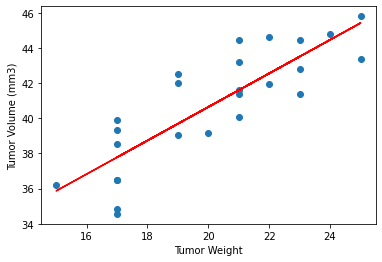

In [91]:
# * Calculate the correlation coefficient and linear regression model between 
# mouse weight and average tumor volume for the Capomulin treatment. 
# Plot the linear regression model on top of the previous scatter plot.
corr = round(st.pearsonr(capo_average['Weight (g)'], capo_average['Tumor Volume (mm3)'])[0],2)
print(f"The correlation coefficient between Tumor Weight and Tumor Volume (mm3) is {corr}")

lr_plot= st.linregress(capo_average['Weight (g)'], capo_average['Tumor Volume (mm3)'])
lr_plot

slope = 0.9544396890241049
intercept=21.552160532685008
regress_values = capo_average['Weight (g)'] * slope + intercept

plt.scatter(capo_average['Weight (g)'], capo_average['Tumor Volume (mm3)'])
plt.plot(capo_average['Weight (g)'],regress_values,"r-")
plt.xlabel('Tumor Weight')
plt.ylabel("Tumor Volume (mm3)")

plt.savefig("Capomulin_linearreg.png")
plt.show()